In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\anipi\Downloads\Customer_Purchase_Behaviour\SQL_PROJECT\Dataset_description\Delinquency_prediction_dataset.csv")

In [3]:
print(df.head())

  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   
3    CUST0004   32  101672.0         413.0            0.371400   
4    CUST0005   60   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   
3                3                   0       88778.0              0.264794   
4                2                   0       13316.0              0.510583   

  Employment_Status  Account_Tenure Credit_Card_Type     Location Month_1  \
0               EMP              18          Student  Los

In [4]:
#Shape of the data set.

In [7]:
print(df.shape)

(500, 19)


In [8]:
#Identifying the variables.

In [10]:
print(df.columns)

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')


In [34]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['customer_id', 'age', 'income', 'credit_score', 'credit_utilization',
       'missed_payments', 'delinquent_account', 'loan_balance',
       'debt_to_income_ratio', 'employment_status', 'account_tenure',
       'credit_card_type', 'location', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6'],
      dtype='object')


In [35]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
print("Number of numerical columns:", len(num_cols))
print("Numerical columns:", list(num_cols))

Number of numerical columns: 9
Numerical columns: ['age', 'income', 'credit_score', 'credit_utilization', 'missed_payments', 'delinquent_account', 'loan_balance', 'debt_to_income_ratio', 'account_tenure']


In [36]:
cat_cols = df.select_dtypes(include = ['object']).columns
print("Number of categorical columns:", len(cat_cols))
print("Categorical columns", list(cat_cols))

Number of categorical columns: 10
Categorical columns ['customer_id', 'employment_status', 'credit_card_type', 'location', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6']


In [37]:
date_cols = df.select_dtypes(include = ['datetime64[ns]']).columns
print("Date Columns:", list(date_cols))

Date Columns: []


In [38]:
#Missing values.

In [39]:
missing = df.isnull().sum()
missing = missing[missing > 0 ].sort_values(ascending = False)
missing

Series([], dtype: int64)

In [40]:
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending = False)
missing_pct

Series([], dtype: float64)

In [ ]:
df['income'].fillna(df['income'].median(), inplace=True)
df['loan_balance'].fillna(df['loan_balance'].median(), inplace=True)
df['credit_score'].fillna(df['credit_score'].median(), inplace=True)

In [43]:
df.isnull().sum()

customer_id             0
age                     0
income                  0
credit_score            0
credit_utilization      0
missed_payments         0
delinquent_account      0
loan_balance            0
debt_to_income_ratio    0
employment_status       0
account_tenure          0
credit_card_type        0
location                0
month_1                 0
month_2                 0
month_3                 0
month_4                 0
month_5                 0
month_6                 0
dtype: int64

In [45]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


In [55]:
#Cor-relation analysis.
corr = df.corr(numeric_only = True)
corr['delinquent_account'].sort_values(ascending = False)


delinquent_account      1.000000
income                  0.043991
credit_score            0.034733
debt_to_income_ratio    0.034386
credit_utilization      0.034224
age                     0.022508
loan_balance           -0.005438
missed_payments        -0.026478
account_tenure         -0.039829
Name: delinquent_account, dtype: float64

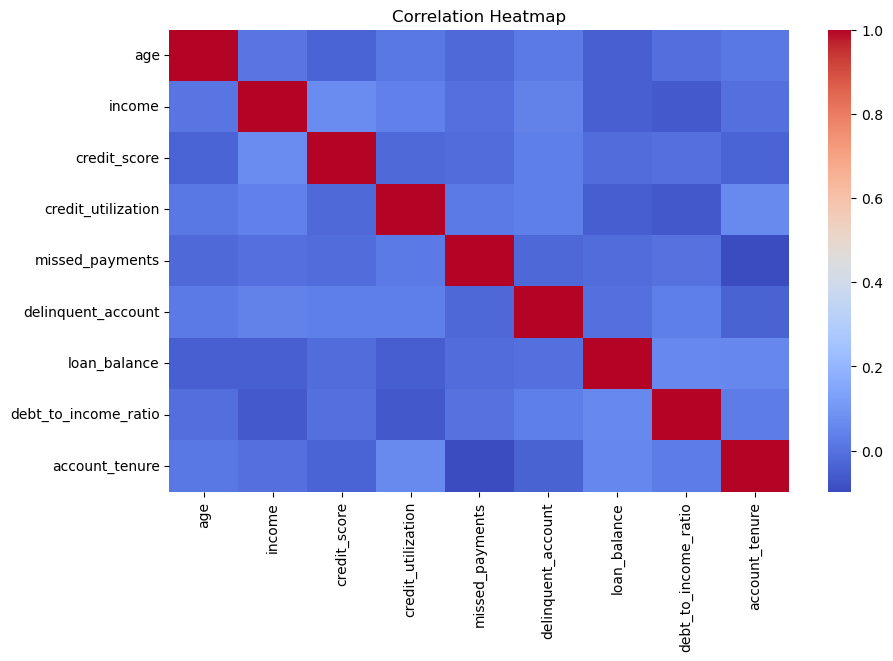

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [57]:
df.groupby('delinquent_account')[['credit_utilization', 'missed_payments', 'debt_to_income_ratio']].mean()


,credit_utilization,missed_payments,debt_to_income_ratio
delinquent_account,,,
0,0.488505,2.990476,0.297445
1,0.506887,2.850000,0.306301


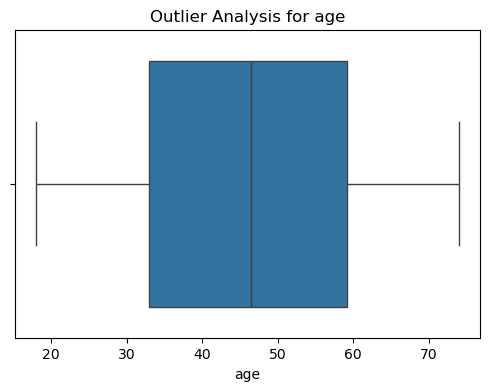

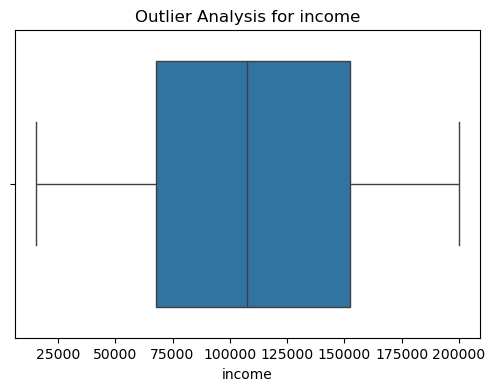

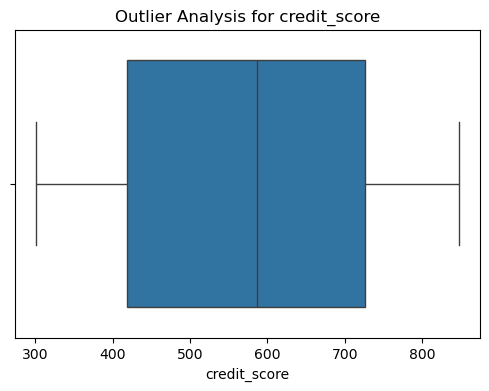

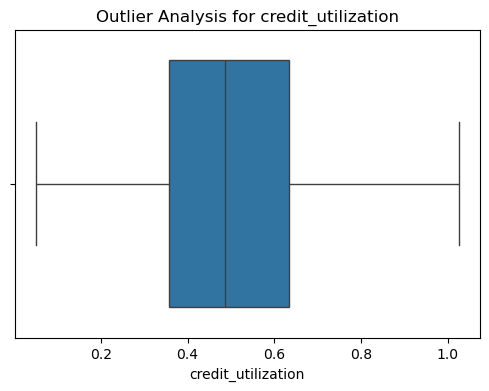

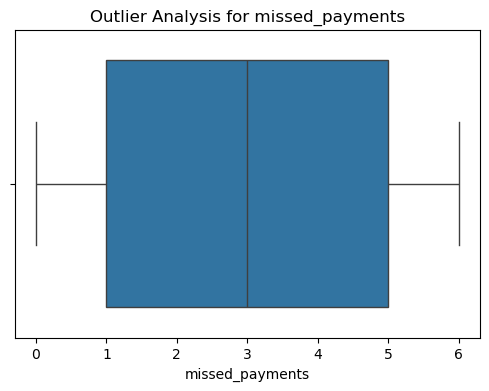

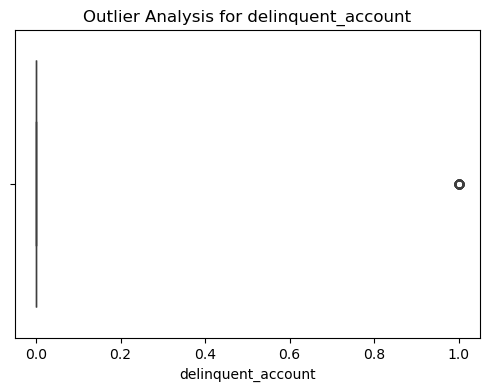

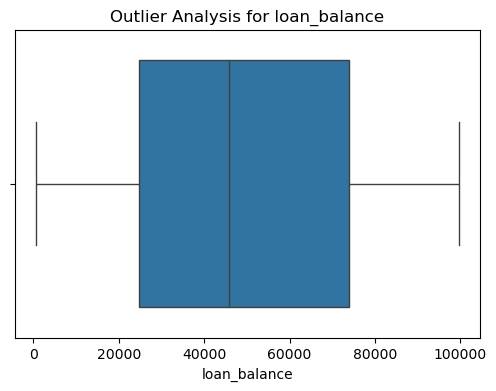

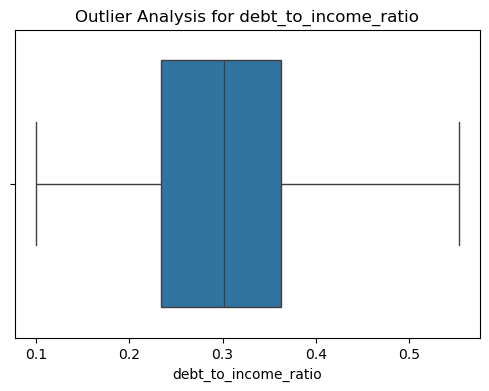

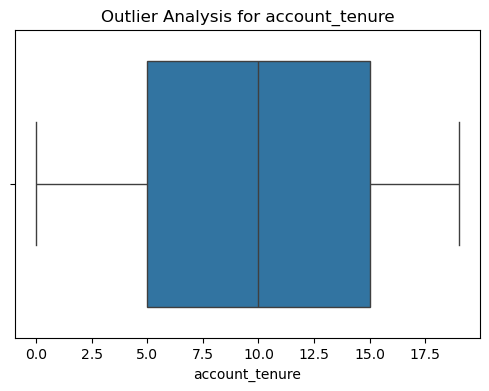

In [60]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Analysis for {col}")
    plt.show()


In [61]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[
    ~((df[num_cols] < (Q1 - 1.5 * IQR)) |
      (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]


In [62]:
print("Before outlier removal:", df.shape)
print("After outlier removal:", df_no_outliers.shape)


Before outlier removal: (500, 19)
After outlier removal: (420, 19)


In [66]:
df.columns

Index(['customer_id', 'age', 'income', 'credit_score', 'credit_utilization',
       'missed_payments', 'delinquent_account', 'loan_balance',
       'debt_to_income_ratio', 'employment_status', 'account_tenure',
       'credit_card_type', 'location', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6'],
      dtype='object')

In [67]:
df['risk_label'] = (
    (df['missed_payments'] > 2) |
    (df['delinquent_account'] == 1) |
    (df['credit_score'] < 600) |
    (df['debt_to_income_ratio'] > 0.4)
).astype(int)


In [68]:
df = df.drop('customer_id', axis=1)


In [69]:
import pandas as pd

df = pd.get_dummies(
    df,
    columns=['employment_status', 'credit_card_type', 'location'],
    drop_first=True
)


In [70]:
X = df.drop('risk_label', axis=1)
y = df['risk_label']


In [72]:
df[['month_1','month_2','month_3','month_4','month_5','month_6']].head()


,month_1,month_2,month_3,month_4,month_5,month_6
0,Late,Late,Missed,Late,Missed,Late
1,Missed,Missed,Late,Missed,On-time,On-time
2,Missed,Late,Late,On-time,Missed,Late
3,Late,Missed,Late,Missed,Late,Late
4,Missed,On-time,Missed,Late,Late,Late


In [73]:
payment_map = {
    'On-time': 0,
    'Late': 1,
    'Missed': 2
}

month_cols = ['month_1','month_2','month_3','month_4','month_5','month_6']

for col in month_cols:
    df[col] = df[col].map(payment_map)


In [74]:
df[month_cols] = df[month_cols].fillna(0)


In [75]:
df.dtypes


age                                  int64
income                             float64
credit_score                       float64
credit_utilization                 float64
missed_payments                      int64
delinquent_account                   int64
loan_balance                       float64
debt_to_income_ratio               float64
account_tenure                       int64
month_1                              int64
month_2                              int64
month_3                              int64
month_4                              int64
month_5                              int64
month_6                              int64
risk_label                           int32
employment_status_Employed            bool
employment_status_Self-employed       bool
employment_status_Unemployed          bool
employment_status_employed            bool
employment_status_retired             bool
credit_card_type_Gold                 bool
credit_card_type_Platinum             bool
credit_card

In [76]:
X = df.drop('risk_label', axis=1)
y = df['risk_label']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.94      0.97        85

    accuracy                           0.95       100
   macro avg       0.88      0.97      0.91       100
weighted avg       0.96      0.95      0.95       100



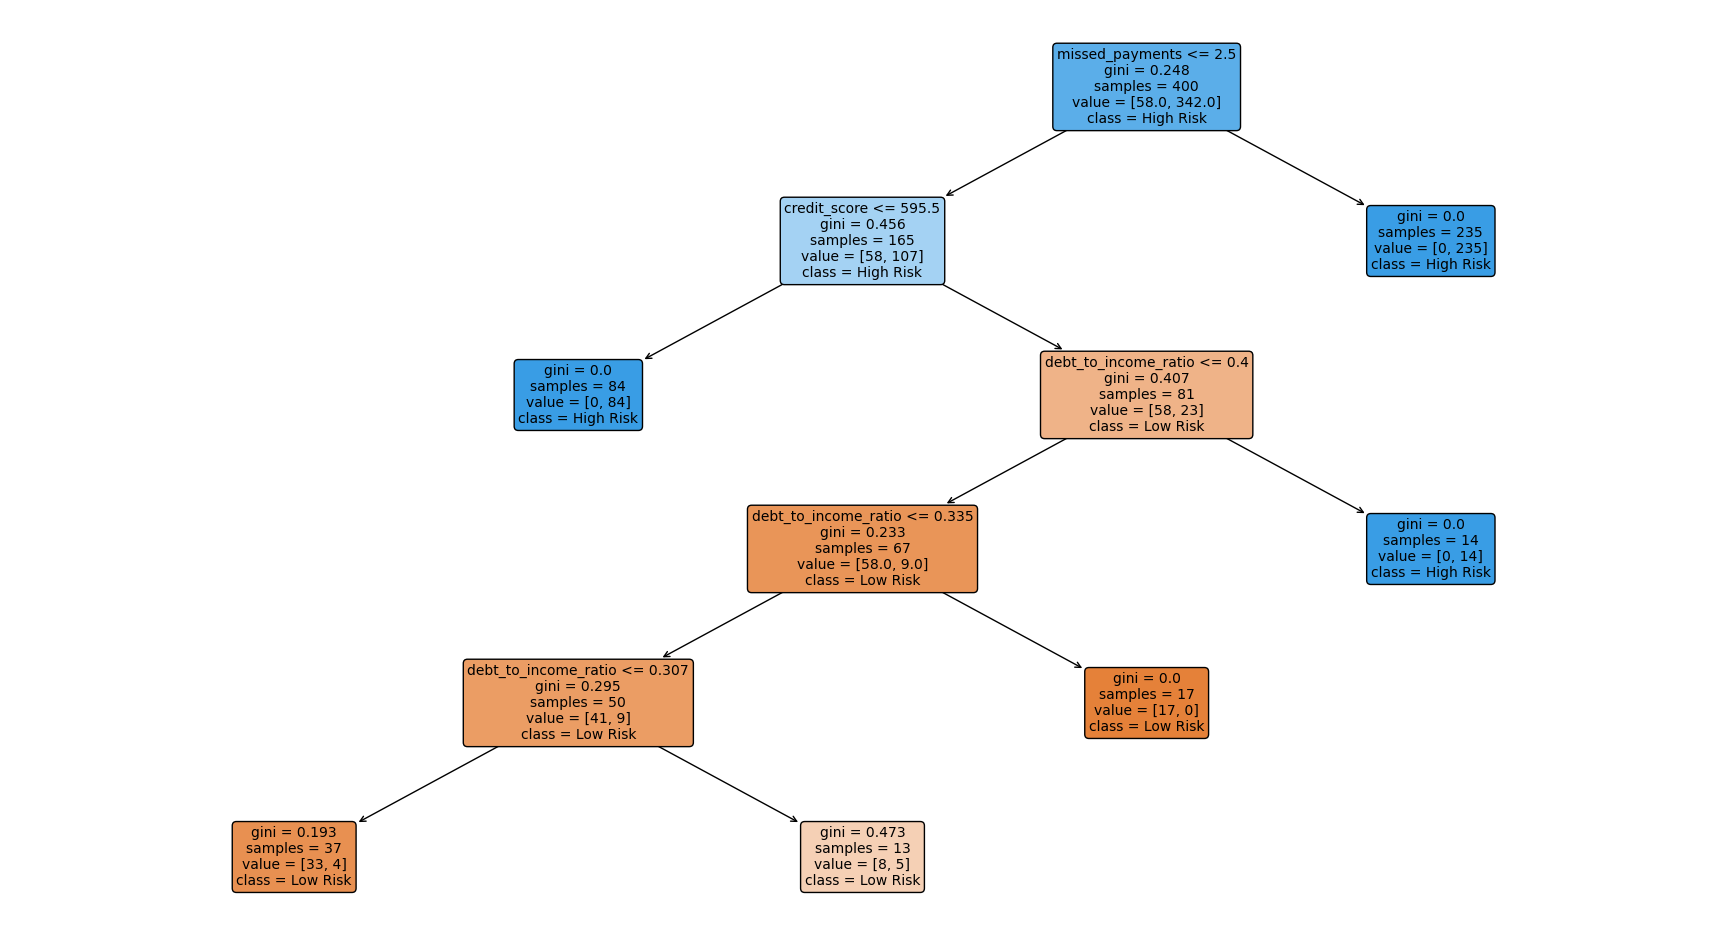

In [77]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(22,12))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Low Risk', 'High Risk'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
